Notebook to find the tide state for a given date.

In [1]:
import arrow
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from salishsea_tools.nowcast import figures

 nowcast.figures.load_archived_observations(name, start_date, end_date)[source]

    Loads tidal observations from the DFO archive website. Note: only archived observations can be loaded. This usually means at least one month old. If data is not available, a DataFrame with one NaN recording is returned.
    Parameters:	

        name (a string from the following - Point Atkinson, Victoria, Campbell River) – a string representing the location for observations
        start_date (string in format %d-%b-%Y) – a string representing the starting date of the observations.
        end (string in format %d-%b-%Y) – a string representing the end date of the observations.

    Returns:	

    wlev_meas: a dict object with the water level measurements reference to Chart Datum. Columns are time and wlev. Time is in UTC.

In [2]:
wlev_meas = figures.load_archived_observations('Point Atkinson', '01-JAN-2015', '31-JAN-2015')

(-2, 6)

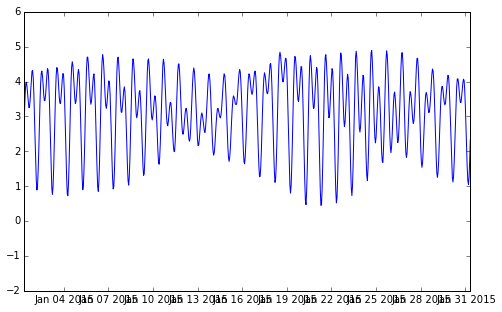

In [3]:
fig, ax = plt.subplots(1,1, figsize=(8,5))
ax.plot(wlev_meas['time'],wlev_meas['wlev'])
ax.set_ylim((-2,6))

For the same period, directly plotted on the DFO site:
<img src="ChartImg.axd.png">

In [6]:
wanted = ['02-Sep-2003',
'02-Dec-2003',
'22-Jun-2011',
'07-Aug-2011',
'10-Sep-2011',
'06-Apr-2012',
'14-Jun-2012',
'16-Jul-2012',
'20-Sep-2012',]

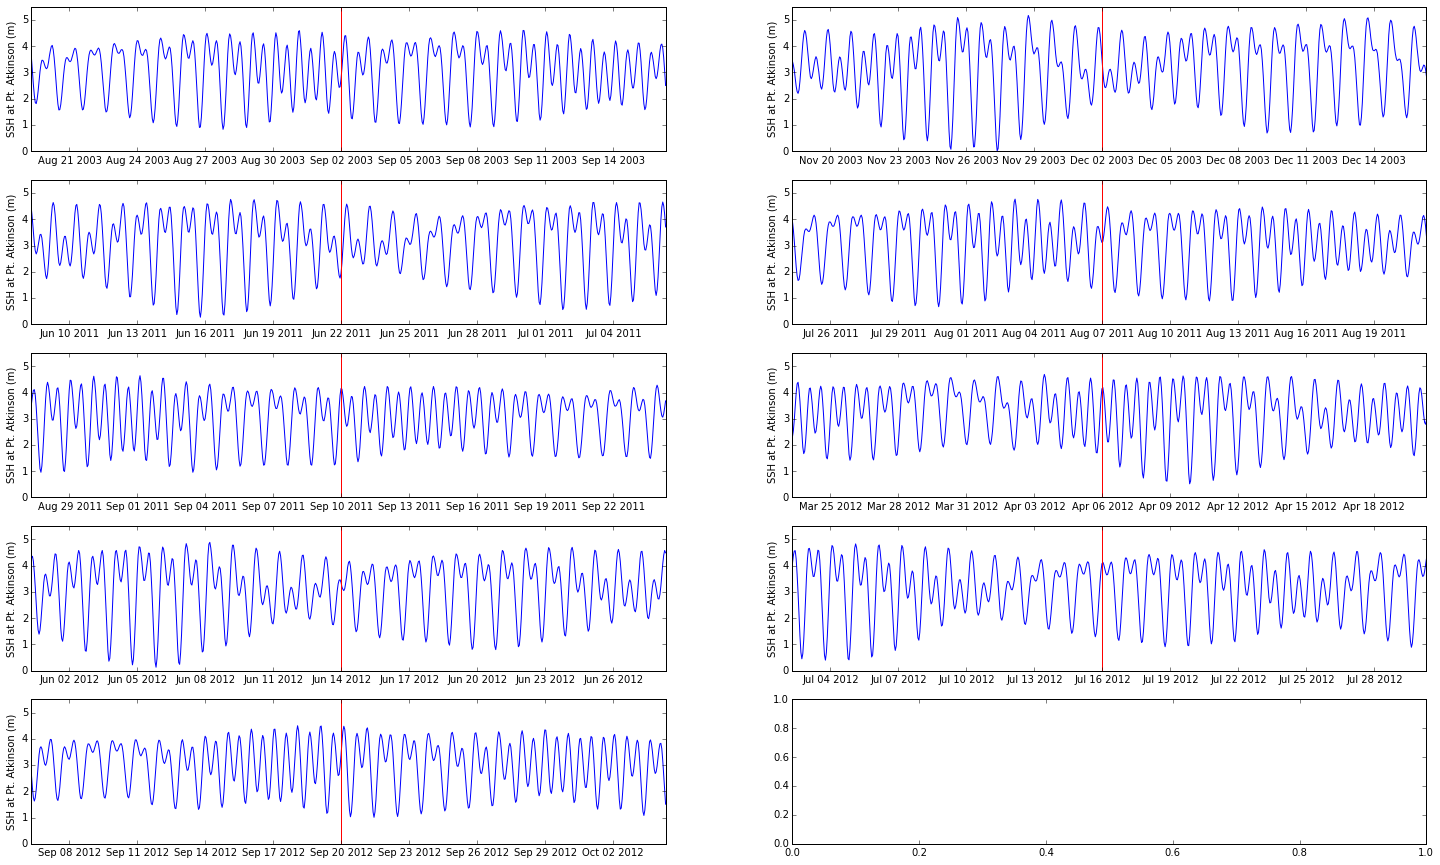

In [7]:
rows = 5; colums = 2
daysbeforeafter = 14
fig, ax = plt.subplots(rows, colums, figsize = (25,15))
for axi, value in enumerate(wanted):
    value_date = arrow.get(value, 'DD-MMM-YYYY')
    start_date = value_date.replace(days=-daysbeforeafter)
    end_date = value_date.replace(days=daysbeforeafter)
    start = start_date.format('DD-MMM-YYYY')
    finish = end_date.format('DD-MMM-YYYY')
    wlev_meas = figures.load_archived_observations('Point Atkinson', start, finish)
    ax[axi//colums,axi%colums].plot(wlev_meas['time'],wlev_meas['wlev'])
    ax[axi//colums,axi%colums].set_ylim((0,5.5))
    ax[axi//colums,axi%colums].axvline(x=value_date, color='r')
    ax[axi//colums,axi%colums].set_ylabel('SSH at Pt. Atkinson (m)')